In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Load the dataset
df=pd.read_csv("/content/drive/MyDrive/salary project/train_dataset.csv")
df_=pd.read_csv("/content/drive/MyDrive/salary project/train_salaries.csv")
df.head()#independent variable dataset

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [ ]:
df_.head()#dependent variable dataset`

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [ ]:
df_.drop("jobId",axis=1,inplace=True)

In [ ]:
#Combining dependent and independent feature.
df=df.join(df_["salary"])
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


BASIC EDA

In [ ]:
#Identifying the number of features and rows in train data
df.shape 

(1000000, 9)

In [ ]:
#Identifying the names of columns
df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [ ]:
#check the type of  train data
df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In [ ]:
#how many unique values are in train dataset
df.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [ ]:
#check for missing values in each column.
df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [ ]:
#Removing 'jobid','companyid' from train data 
df.drop(["jobId","companyId"],axis=1,inplace=True)
df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [ ]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [ ]:
df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


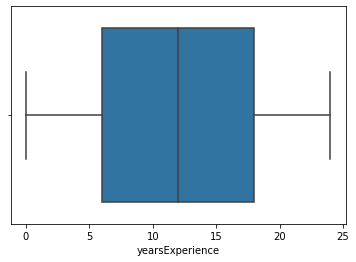

In [ ]:
sns.boxplot(df["yearsExperience"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


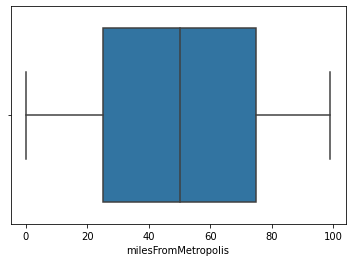

In [ ]:
sns.boxplot(df["milesFromMetropolis"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


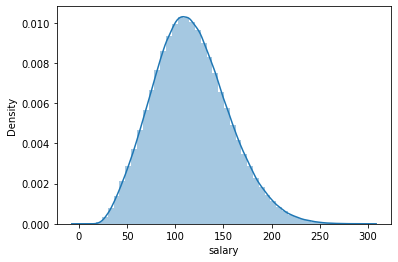

In [ ]:

sns.distplot(df["salary"])

In [ ]:
df["salary"].skew() # its value is in between -0.5 to +0.5,it means approximately symmetric

0.346415074651208

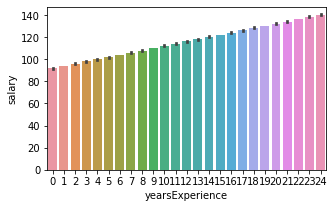

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x="yearsExperience",y="salary",data=df)
plt.show()

Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.



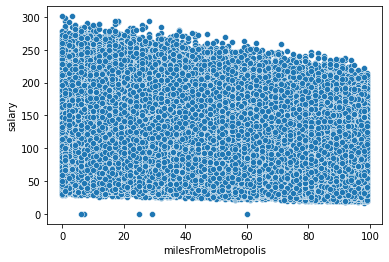

In [ ]:
sns.scatterplot(x="milesFromMetropolis",y="salary",data=df)
plt.show()

Increase in value on milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.



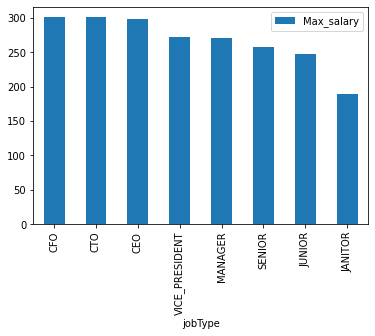

In [ ]:
#plot the maximum salary of each jobtype.
max=pd.DataFrame(df.groupby("jobType")["salary"].max())
max.columns=["Max_salary"]
max.sort_values(by="Max_salary",ascending=False).plot(kind="bar")
plt.show()

From above chart,TOP3 positions like CFO,CTO,CEO have highest salary.

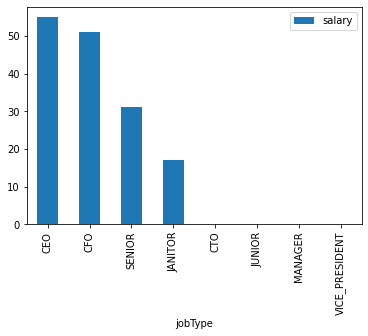

In [ ]:
#plot the  minimum salary of each jobtype.
min=pd.DataFrame(df.groupby("jobType")["salary"].min())
min.sort_values(by='salary',ascending=False).plot(kind='bar')
plt.show()

In above chart , minimum salary is zero who are working as a cto,junior, manager, vice_president. So,Minimum salary cannot be zero for all those positions.So these are outliers. 
 

In [ ]:
df[df["salary"]==0]

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JUNIOR,NONE,NONE,OIL,1,25,0
652076,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [ ]:
#Remove above outliers
index_names=df[df["salary"]==0].index
df.drop(index_names,inplace=True)
df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


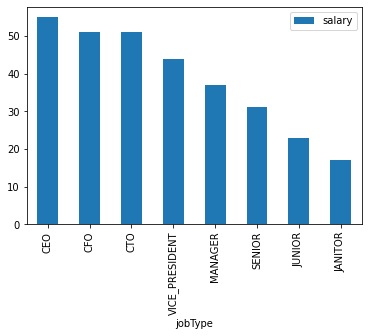

In [ ]:
#plot the  minimum salary of each jobtype.
min=pd.DataFrame(df.groupby("jobType")["salary"].min())
min.sort_values(by='salary',ascending=False).plot(kind='bar')
plt.show()

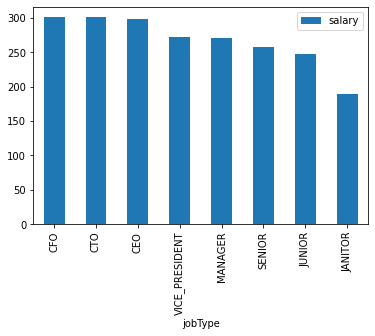

In [ ]:
max=pd.DataFrame(df.groupby("jobType")["salary"].max())
max.sort_values(by='salary',ascending=False).plot(kind='bar')
plt.show()

In [ ]:
max.rename(columns={"salary":"Max_salary"},inplace=True)
min.rename(columns={"salary":"Min_salary"},inplace=True)

In [ ]:
DF=pd.concat([max,min],axis=1)
DF.rename(columns={"salary":"Min","salary":"Max"},inplace=True)
DF.head()

,Max_salary,Min_salary
jobType,,
CEO,298,55
CFO,301,51
CTO,301,51
JANITOR,189,17
JUNIOR,248,23


From above chart, Janitor has lowest salary among all positions.

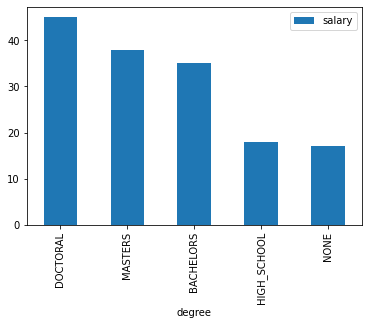

In [ ]:
#plot the  maximum salary of each degree.
max_=pd.DataFrame(df.groupby("degree")["salary"].min())
max_.sort_values(by='salary',ascending=False).plot(kind='bar')
plt.show()

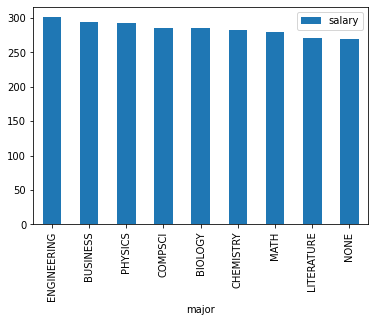

In [ ]:

#plot the  maximum salary of each major.
max_=pd.DataFrame(df.groupby("major")["salary"].max())
max_.sort_values(by='salary',ascending=False).plot(kind='bar')
plt.show()

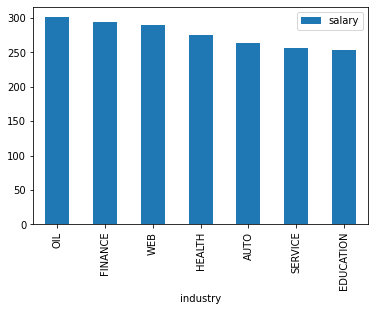

In [ ]:
#plot the  maximum salary of each industry.
Max_=pd.DataFrame(df.groupby("industry")["salary"].max())
Max_.sort_values(by='salary',ascending=False).plot(kind='bar')
plt.show()

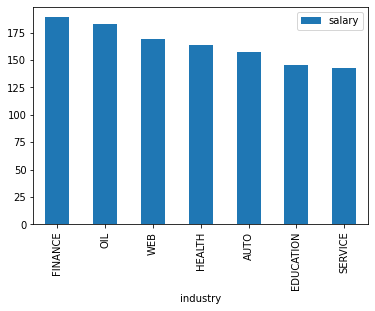

In [ ]:
# which industry janitor has highest salary?
Df=df[df["jobType"]=="JANITOR"]
jan=pd.DataFrame(Df.groupby("industry")["salary"].max())
jan.sort_values(by="salary",ascending=False).plot(kind="bar")
plt.show()

In [ ]:
#Remove those points who are working on a position like ceo,cto,cfo,vice_president and they have high_school and none degree and zero experience. how it can be ?
def rem(dataset):
  DF=pd.DataFrame()
  data=dataset[dataset["yearsExperience"]==0]
  pos=["CEO","CTO","CFO","VICE_PRESIDENT","MANAGER"]
  for i in range(0,5):
    rem= data[data["jobType"]==pos[i]]
    remove=rem[rem["degree"].isin(["NONE","HIGH_SCHOOL"])]
    DF=DF.append(remove) 
  return DF   

In [ ]:
k=rem(df)
k.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
607,CEO,HIGH_SCHOOL,NONE,EDUCATION,0,9,103
858,CEO,NONE,NONE,FINANCE,0,13,151
1031,CEO,NONE,NONE,AUTO,0,42,71
1096,CEO,HIGH_SCHOOL,NONE,FINANCE,0,44,132
1492,CEO,NONE,NONE,WEB,0,34,92


In [ ]:
#drop above data points from entire data
index_nam= k.index
df.drop(index_nam,inplace=True)
df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


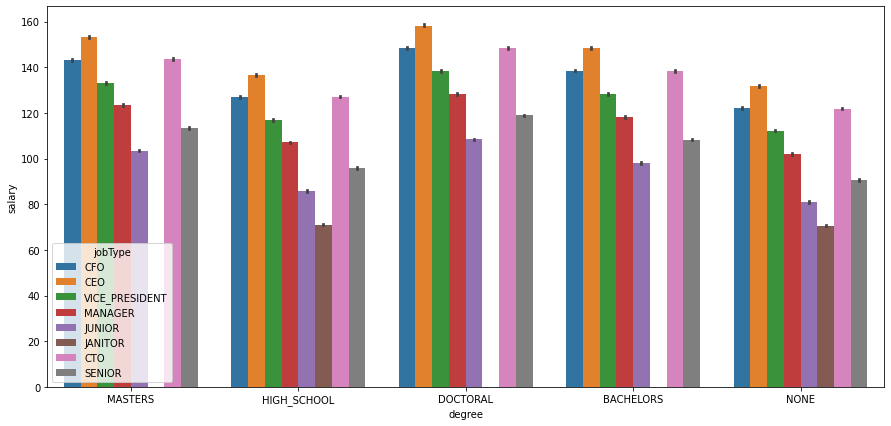

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y="salary",x="degree",hue="jobType",data=df)
plt.show()

Janitor has highest qualifications either none or high school.Doctorate degree employees are earning high in each positions.

#Convert categorical feature into numeric using one hot Encoding

In [ ]:
#Convert categorical feature into numeric using one hot Encoding
data=pd.get_dummies(df["major"])
data_1=pd.get_dummies(df["industry"])

In [ ]:
df=pd.concat([df,data,data_1],axis=1)
df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,BIOLOGY,BUSINESS,CHEMISTRY,...,MATH,NONE,PHYSICS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,CFO,MASTERS,MATH,HEALTH,10,83,130,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# Convert Ordinal features into numerical using Label Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()
label=label_encoder.fit_transform(df["jobType"])
label_1=label_encoder.fit_transform(df["degree"])

In [ ]:
df["jobType"]=label
df["degree"]=label_1

In [ ]:
df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,BIOLOGY,BUSINESS,CHEMISTRY,...,MATH,NONE,PHYSICS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,1,3,MATH,HEALTH,10,83,130,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,2,NONE,WEB,3,73,101,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,7,1,PHYSICS,HEALTH,10,38,137,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,5,1,CHEMISTRY,AUTO,8,17,142,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,7,0,PHYSICS,FINANCE,8,16,163,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
df.drop(["major","industry"],axis=1,inplace=True)

In [ ]:
df.head()

,jobType,degree,yearsExperience,milesFromMetropolis,salary,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,...,MATH,NONE,PHYSICS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,1,3,10,83,130,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,2,3,73,101,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,7,1,10,38,137,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,5,1,8,17,142,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,7,0,8,16,163,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
df.rename(columns={"jobType":'Job Type',"degree":"Degree","yearsExperience":"Experience(in yrs)","milesFromMetropolis":"Distance from Metropolis (in miles)","salary":"Salary"},inplace=True)

In [ ]:
df.head()

,Job Type,Degree,Experience(in yrs),Distance from Metropolis (in miles),Salary,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,...,MATH,NONE,PHYSICS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,1,3,10,83,130,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,2,3,73,101,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,7,1,10,38,137,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,5,1,8,17,142,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,7,0,8,16,163,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# Separate Independent and Dependent Variable.
X=df.drop("Salary",axis=1)
Y=df["Salary"]

In [ ]:
X.shape

(990190, 20)

In [ ]:
X.head()

,Job Type,Degree,Experience(in yrs),Distance from Metropolis (in miles),BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,1,3,10,83,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,2,3,73,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,7,1,10,38,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,5,1,8,17,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,7,0,8,16,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


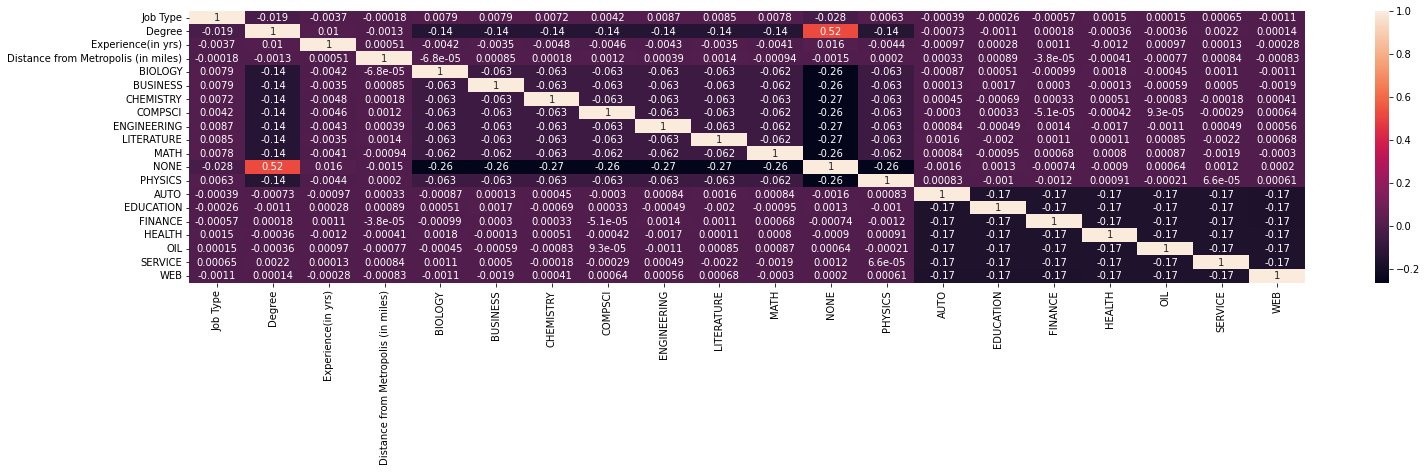

In [ ]:
plt.figure(figsize=(25,5))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [ ]:
#Size of data is large. So, Take a sample of this data
X_=X[:300000]
Y_=Y[:300000]

#  Checking Accuracy for different algorithms

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.25, random_state=1)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def predict(ml_model):
    model=ml_model.fit(X_train,Y_train)
    print("Training score is :{}".format(model.score(X_train,Y_train)))
    predictions=model.predict(X_test)
    print("Predictions are:{}".format(predictions))
    R2_score= r2_score(Y_test,predictions)
    print("Score of {""} model is {""}".format(ml_model,R2_score))
    print("Errors:")
    print("MAE is:",mean_absolute_error(Y_test,predictions))
    print("MSE is :",mean_squared_error(Y_test,predictions))
    print("RMSE is:",np.sqrt(mean_absolute_error(Y_test,predictions)))
    

In [ ]:
predict(LinearRegression())
predict(KNeighborsRegressor())
predict(DecisionTreeRegressor())
predict(RandomForestRegressor())

Training score is :0.5204260123595116
Predictions are:[100.66797131 123.23244009 154.96856403 ...  72.35185248 115.52151009
 101.42092705]
Score of LinearRegression() model is 0.5216771307561408
Errors:
MAE is: 22.133409465739067
MSE is : 723.7672474787987
RMSE is: 4.704615761753458
Training score is :0.7639964219317307
Predictions are:[107.8 112.2 159.8 ...  94.2  90.6 103. ]
Score of KNeighborsRegressor() model is 0.6432524588732567
Errors:
MAE is: 18.357605333333332
MSE is : 539.8073194666666
RMSE is: 4.284577614343488
Training score is :0.9832814880909283
Predictions are:[ 94. 162. 125. ... 110.  86. 129.]
Score of DecisionTreeRegressor() model is 0.5082396963356697
Errors:
MAE is: 21.23856466666666
MSE is : 744.0999046629629
RMSE is: 4.608531725687333
Training score is :0.9488932099905777
Predictions are:[105.93466667 145.68       159.57       ...  88.4625      87.26583333
 117.77      ]
Score of RandomForestRegressor() model is 0.71315264864415
Errors:
MAE is: 16.6116904311729
MS

In [ ]:
#Making predictions on the test data
#Y_pred = lr.predict(X_test)

# Comparing the predicted salary with actual salary
#pd.DataFrame(data={'Predicted Salary': Y_pred, 'Actual Salary': Y_test})


In [ ]:
#MANUL HYPERPARAMETER TUNING:
model=RandomForestRegressor(n_estimators=150,criterion='mse',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,Y_train)
predictions=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [ ]:
model.score(X_train,Y_train)

0.784326828856692

In [ ]:
model.score(X_test,Y_test)

0.7525752368865845

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']}


In [ ]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  30.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  30.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  30.9s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=890, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=200; total time=  26.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=890, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=200; total time=  26.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=890, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=200; total time=  26.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=890, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time= 3.7min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=890, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time= 3.9min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=890, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time= 3.6min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=400; total time=  52.7s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=400; total time=  52.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=400; total time=  56.7s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=670, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time= 3.8min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=670, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time= 3.8min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=670, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time= 3.8min


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
#BEST PARAMETER
rf_random.best_params_

{'criterion': 'mse',
 'max_depth': 890,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 14,
 'n_estimators': 400}

In [ ]:
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
best_random_grid=rf_random.best_estimator_

In [ ]:
test_pred=best_random_grid.predict(X_test)
train_pred=best_random_grid.predict(X_train)

In [ ]:
## Increased Accuracy on test data by selecting best parameter using random forest regressor.
test_score=r2_score(Y_test,test_pred)
print("Accuracy of a model is {}".format(test_score))

Accuracy of a model is 0.7531647564133358


In [ ]:
## Increased Accuracy on test data by selecting best parameter using random forest regressor.
train_score=r2_score(Y_train,train_pred)
print("Accuracy of a model is {}".format(train_score))
    

Accuracy of a model is 0.7920316182813774


In [ ]:
# Calculate the absolute errors
errors = abs(test_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 15.63
Accuracy: 86.02 %.


In [ ]:
import pickle

In [ ]:
#HOW TO DUMP A MODEL.
with open("Salary_prediction","wb") as f:
  pickle.dump(rf_random,f)

In [ ]:
with open("Salary_prediction","rb") as f:
  random=pickle.load(f)

In [ ]:
with open("Emp_salary_prediction.pkl","wb") as F:
  pickle.dump(model,F)

In [ ]:
with open("Emp_salary_prediction.pkl","rb") as F:
  mod=pickle.load(F)

In [ ]:
r=random.predict(X_test)

In [ ]:
m=mod.predict(X_test)

In [ ]:
r2_score(r,Y_test)

0.6488488168064659

In [ ]:
r2_score(m,Y_test)

0.6442180554582482